In [2]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import seaborn as sns
import matplotlib.pyplot as plt

database = "olist.db"
connection = sql.connect(database)

#For this project, I will use 5 tables; (1) Seller, (2) Order Items, (3) Orders, (4) Order Review. and (5) Products

#Calling necessary tables
seller = '''SELECT * FROM olist_sellers_dataset'''
order_items = '''SELECT * FROM olist_order_items_dataset'''
orders = '''SELECT * FROM olist_order_dataset'''
order_review = '''SELECT * FROM olist_order_reviews_dataset'''
product_category = '''SELECT * FROM product_category_name_translation'''
products = '''SELECT * FROM olist_products_dataset'''

#Pandas DataFrame
seller_df = pd.read_sql(seller, connection)
order_items_df = pd.read_sql(order_items, connection)
orders_df = pd.read_sql(orders, connection)
order_review_df = pd.read_sql(order_review, connection)
product_category_df = pd.read_sql(product_category, connection)
products_df = pd.read_sql(products, connection)

In [82]:
#Seller Table Information
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   3095 non-null   int64 
 1   seller_id               3095 non-null   object
 2   seller_zip_code_prefix  3095 non-null   int64 
 3   seller_city             3095 non-null   object
 4   seller_state            3095 non-null   object
dtypes: int64(2), object(3)
memory usage: 121.0+ KB


In [83]:
#Order Items Information
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                112650 non-null  int64  
 1   order_id             112650 non-null  object 
 2   order_item_id        112650 non-null  int64  
 3   product_id           112650 non-null  object 
 4   seller_id            112650 non-null  object 
 5   shipping_limit_date  112650 non-null  object 
 6   price                112650 non-null  float64
 7   freight_value        112650 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 6.9+ MB


In [84]:
#Orders Information
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   index                          99441 non-null  int64 
 1   order_id                       99441 non-null  object
 2   customer_id                    99441 non-null  object
 3   order_status                   99441 non-null  object
 4   order_purchase_timestamp       99441 non-null  object
 5   order_approved_at              99281 non-null  object
 6   order_delivered_carrier_date   97658 non-null  object
 7   order_delivered_customer_date  96476 non-null  object
 8   order_estimated_delivery_date  99441 non-null  object
dtypes: int64(1), object(8)
memory usage: 6.8+ MB


In [85]:
#Order Review Information
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   index                    99224 non-null  int64 
 1   review_id                99224 non-null  object
 2   order_id                 99224 non-null  object
 3   review_score             99224 non-null  int64 
 4   review_comment_title     11568 non-null  object
 5   review_comment_message   40977 non-null  object
 6   review_creation_date     99224 non-null  object
 7   review_answer_timestamp  99224 non-null  object
dtypes: int64(2), object(6)
memory usage: 6.1+ MB


In [86]:
#Products Information
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       32951 non-null  int64  
 1   product_id                  32951 non-null  object 
 2   product_category_name       32341 non-null  object 
 3   product_name_lenght         32341 non-null  float64
 4   product_description_lenght  32341 non-null  float64
 5   product_photos_qty          32341 non-null  float64
 6   product_weight_g            32949 non-null  float64
 7   product_length_cm           32949 non-null  float64
 8   product_height_cm           32949 non-null  float64
 9   product_width_cm            32949 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ MB


In [87]:
#Identifying Missing Values of Seller Table
seller_df.isna().sum()
# Summary: No missing values found

index                     0
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [88]:
#Identifying Missing Values of Order Items Table
order_items_df.isna().sum()
# Summary: No missing values found

index                  0
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [89]:
#Identifying Missing Values of Order Table
orders_df.isna().sum()
# Summary: No missing values found. If it is there, it is not essential data.

index                               0
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [90]:
#Identifying Missing Values of Order Review Table
order_review_df.isna().sum()
# Summary: No missing values found. If it is there, it is not essential data.

index                          0
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [91]:
#Identifying Missing Values of product Table
products_df.isna().sum()
# Summary: No missing values found. If it is there, it is not essential data.

index                           0
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [92]:
#Identifying Outlier of Seller.
seller_df.describe()
#Summary: No outlier found. If it is there, it is not essential data.

,index,seller_zip_code_prefix
count,3095.000000,3095.000000
mean,1547.000000,32291.059451
std,893.593867,32713.453830
min,0.000000,1001.000000
25%,773.500000,7093.500000
50%,1547.000000,14940.000000
75%,2320.500000,64552.500000
max,3094.000000,99730.000000


In [93]:
#Identifying Outlier of Order Items.
order_items_df.describe()
#Summary: There is outlier in price.

,index,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000,112650.000000
mean,56324.500000,1.197834,120.653739,19.990320
std,32519.398249,0.705124,183.633928,15.806405
min,0.000000,1.000000,0.850000,0.000000
25%,28162.250000,1.000000,39.900000,13.080000
50%,56324.500000,1.000000,74.990000,16.260000
75%,84486.750000,1.000000,134.900000,21.150000
max,112649.000000,21.000000,6735.000000,409.680000


In [94]:
#Identifying Outlier of Orders.
orders_df.describe()
#Summary: No outlier found. If it is there, it is not essential data.

,index
count,99441.000000
mean,49720.000000
std,28706.288396
min,0.000000
25%,24860.000000
50%,49720.000000
75%,74580.000000
max,99440.000000


In [95]:
#Identifying Outlier of Order Review.
order_review_df.describe()
#Summary: No outlier found. If it is there, it is not essential data.

,index,review_score
count,99224.000000,99224.000000
mean,49611.500000,4.086421
std,28643.645892,1.347579
min,0.000000,1.000000
25%,24805.750000,4.000000
50%,49611.500000,5.000000
75%,74417.250000,5.000000
max,99223.000000,5.000000


In [96]:
#Identifying Outlier of Order Review.
products_df.describe()
#Summary: No outlier found. If it is there, it is not essential data.

,index,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,16475.000000,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,9512.278697,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,8237.500000,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,16475.000000,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,24712.500000,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,32950.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [97]:
#Check outlier for price in order items table

# Identify outliers using IQR
Q1 = order_items_df['price'].quantile(0.25)
Q3 = order_items_df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Make a new DataFrame to select outliers and apply the filter
outliers_df = order_items_df[(order_items_df['price'] < lower_threshold) | (order_items_df['price'] > upper_threshold)]

# Merge the necessary DataFrames to get the desired columns
merged_df = (
    outliers_df[['product_id', 'price']]
    .merge(products_df[['product_id', 'product_category_name']], on='product_id')
    .merge(product_category_df[['product_category_name', 'product_category_name_english']], on='product_category_name')
)

# Display the resulting DataFrame with the desired columns
merged_df[['product_id', 'product_category_name','product_category_name_english', 'price']]

#After looking at the table, I conclude that the outlier price is indeed the normal price for the product.

,product_id,product_category_name,product_category_name_english,price
0,557d850972a7d6f792fd18ae1400d9b6,ferramentas_jardim,garden_tools,810.00
1,636598095d69a5718e67d2c9a3c7dde6,ferramentas_jardim,garden_tools,308.00
2,636598095d69a5718e67d2c9a3c7dde6,ferramentas_jardim,garden_tools,329.00
3,636598095d69a5718e67d2c9a3c7dde6,ferramentas_jardim,garden_tools,308.00
4,636598095d69a5718e67d2c9a3c7dde6,ferramentas_jardim,garden_tools,308.00
...,...,...,...,...
8335,b29c1749f99da888ea322a01420d5220,tablets_impressao_imagem,tablets_printing_image,889.99
8336,0c800efe70e04ffcc3b266946e3e4826,la_cuisine,la_cuisine,389.00
8337,107fde0930956120d1e13dd1062fbb46,moveis_colchao_e_estofado,furniture_mattress_and_upholstery,399.99
8338,af87aa3f5f2c05c8c4db6bee2088672b,moveis_colchao_e_estofado,furniture_mattress_and_upholstery,399.99


In [98]:
#Identifying Duplicate of Seller
seller_df[seller_df.duplicated(keep=False)]
#Summary: there is no duplicated data in seller table

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state


In [99]:
#Identifying Duplicate of order items
order_items_df[order_items_df.duplicated(keep=False)]
#Summary: there is no duplicated data in order items table

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [100]:
#Identifying Duplicate of orders
orders_df[orders_df.duplicated(keep=False)]
#Summary: there is no duplicated data in orders table

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [101]:
#Identifying Duplicate of order review
order_review_df[order_review_df.duplicated(keep=False)]
#Summary: there is no duplicated data in order review table

,index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


In [102]:
#Identifying Duplicate of products
products_df[products_df.duplicated(keep=False)]
#Summary: there is no duplicated data in products table

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [103]:
#Identifying Inconsistent Format of Seller
print(seller_df["seller_state"].unique())
print(seller_df["seller_city"].unique())
#Summary: There is inconsistent format in seller_city

['SP' 'RJ' 'PE' 'PR' 'GO' 'SC' 'BA' 'DF' 'RS' 'MG' 'RN' 'MT' 'CE' 'PB'
 'AC' 'ES' 'RO' 'PI' 'MS' 'SE' 'MA' 'AM' 'PA']
['campinas' 'mogi guacu' 'rio de janeiro' 'sao paulo' 'braganca paulista'
 'brejao' 'penapolis' 'curitiba' 'anapolis' 'itirapina' 'tubarao'
 'lauro de freitas' 'imbituba' 'brasilia' 'porto seguro' 'guaruja'
 'tabatinga' 'salto' 'tres de maio' 'belo horizonte' 'arapongas'
 'sao bernardo do campo' 'tatui' 'garopaba' 'camanducaia' 'tupa'
 'guarulhos' 'sao jose dos pinhais' 'sao ludgero' 'sao jose' 'piracicaba'
 'porto alegre' 'congonhal' 'santo andre' 'osasco' 'valinhos' 'joinville'
 'saquarema' 'barra velha' 'petropolis' 'santo antonio da patrulha'
 'ponta grossa' 'santana de parnaiba' 'sao carlos' 'ibitinga' 'barueri'
 'caxias do sul' 'araguari' 'contagem' 'jaragua do sul' 'lages - sc'
 'bento goncalves' 'catanduva' 'ribeirao pires' 'jaboticabal' 'echapora'
 'cotia' 'rio do sul' 'sorocaba' 'pradopolis' 'itaborai' 'mirassol'
 'birigui' 'assis' 'jaguariuna' 'araraquara' 'm

In [105]:
#Identifying Inconsistent Format of Order Items
print(order_items_df["price"].unique())
print(order_items_df["order_item_id"].unique())
#Summary: there is no inconsistent format in order times table

[ 58.9  239.9  199.   ...   7.84 399.85 736.  ]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [106]:
#Identifying Inconsistent Format of orders
print(orders_df["order_status"].unique())
print(orders_df['order_purchase_timestamp'].unique())
#Summary: there is no inconsistent format in orders table

['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']
['2017-10-02 10:56:33' '2018-07-24 20:41:37' '2018-08-08 08:38:49' ...
 '2017-08-27 14:46:43' '2018-01-08 21:28:27' '2018-03-08 20:57:30']


In [107]:
#Identifying Inconsistent Format of order review
print(order_review_df["review_score"].unique())
#Summary: there is no inconsistent format in order review table

[4 5 1 3 2]


In [108]:
#Identifying Inconsistent Format of products
print(products_df["product_category_name"].unique())
#Summary: there is no inconsistent format in products table

['perfumaria' 'artes' 'esporte_lazer' 'bebes' 'utilidades_domesticas'
 'instrumentos_musicais' 'cool_stuff' 'moveis_decoracao'
 'eletrodomesticos' 'brinquedos' 'cama_mesa_banho'
 'construcao_ferramentas_seguranca' 'informatica_acessorios'
 'beleza_saude' 'malas_acessorios' 'ferramentas_jardim'
 'moveis_escritorio' 'automotivo' 'eletronicos' 'fashion_calcados'
 'telefonia' 'papelaria' 'fashion_bolsas_e_acessorios' 'pcs'
 'casa_construcao' 'relogios_presentes'
 'construcao_ferramentas_construcao' 'pet_shop' 'eletroportateis'
 'agro_industria_e_comercio' None 'moveis_sala' 'sinalizacao_e_seguranca'
 'climatizacao' 'consoles_games' 'livros_interesse_geral'
 'construcao_ferramentas_ferramentas' 'fashion_underwear_e_moda_praia'
 'fashion_roupa_masculina'
 'moveis_cozinha_area_de_servico_jantar_e_jardim'
 'industria_comercio_e_negocios' 'telefonia_fixa'
 'construcao_ferramentas_iluminacao' 'livros_tecnicos'
 'eletrodomesticos_2' 'artigos_de_festas' 'bebidas' 'market_place'
 'la_cuisine' 'cons

In [110]:
# Handling Inconsitent Format for seller_city in seller dataframe
map_inkonsistent = {
    '04482255': 'sao paulo',
    'ampere': 'amparo',
    'angra dos reis rj': 'angra dos reis',
    'ao bernardo do campo': 'sao bernardo do campo',
    'auriflama/sp': 'auriflama',
    'balenario camboriu': 'balneario camboriu',
    'barbacena/ minas gerais': 'barbacena',
    'belo horizont': 'belo horizonte',
    'brasilia df': 'brasilia',
    'carapicuiba / sao paulo': 'carapicuiba',
    'cariacica / es': 'cariacica',
    'cascavel': 'cascavael',
    'ferraz de  vasconcelos': 'ferraz de vasconcelos',
    'jacarei / sao paulo': 'jacarei',
    'lages - sc': 'lages',
    'maua/sao paulo': 'maua',
    'mogi das cruses': 'mogi das cruzes',
    'mogi das cruzes / sp': 'mogi das cruzes',
    'novo hamburgo, rio grande do sul, brasil': 'novo hamburgo',
    'pinhais/pr': 'pinhais/pr',
    'ribeirao preto / sao paulo': 'ribeirao preto',
    'ribeirao pretp': 'ribeirao preto',
    'riberao preto': 'ribeirao preto',
    'rio de janeiro / rio de janeiro': 'rio de janeiro',
    'rio de janeiro \\rio de janeiro': 'rio de janeiro',
    'rio de janeiro, rio de janeiro, brasil': 'rio de janeiro',
    's jose do rio preto': 'sao jose do rio preto',
    "santa barbara d oeste": "santa barbara d'oeste",
    "santa barbara d´oeste": "santa barbara d'oeste",
    'santo andre/sao paulo': 'santo andre',
    'sao  jose dos pinhais': 'sao jose dos pinhais',
    'sao  paulo': 'sao paulo',
    'sao bernardo do capo': 'sao bernardo do campo',
    'sao jose do rio pret': 'sao jose do rio preto',
    'sao jose dos pinhas': 'sao jose dos pinhais',
    "sao miguel do oeste": "sao miguel d'oeste",
    'sao paluo': 'sao paulo',
    'sao paulo - sp': 'sao paulo',
    'sao paulo / sao paulo': 'sao paulo',
    'sao paulo sp': 'sao paulo',
    'sao paulop': 'sao paulo',
    'sao pauo': 'sao paulo',
    'sao sebastiao da grama/sp': 'sao sebastiao da grama',
    'são paulo': 'sao paulo',
    'sbc': 'sao bernardo de campo',
    'sbc/sp': 'sao bernardo de campo',
    'scao jose do rio pardo': 'sao jose do rio pardo',
    'sp': 'sao paulo',
    'sp / sp': 'sao paulo',
    'tabao da serra': 'taboao da serra',
    "arraial d'ajuda (porto seguro)" : "porto seguro",
    'aguas claras df' : 'aguas claras',
    'andira-pr' : 'andira',
    'cascavel' : 'cascavael',
    'floranopolis' : 'florianopolis',
    'garulhos' : 'guarulhos',
    'poa' : 'porto alegre',
    'portoferreira' : 'porto ferreira',
    'robeirao preto' : 'ribeirao preto',
    'sando andre' : 'santo andre',
    'pinhais/pr' : 'pinhais'
    
}

seller_df['seller_city'] = seller_df['seller_city'].replace(map_inkonsistent)

In [111]:
# Deleting rows who had inconsistent format such as municipality city instead of city in brazil
# List of entries to be removed from seller_city column
entries_to_remove = [
    'vendas@creditparts.com.br',
    'bahia',
    'centro',
    'minas gerais',
    'california',
    'holambra',
    'mineiros do tiete',
    'paulo lopes',
    'parai',
    'pirituba',
    'castro pires',
    'neopolis',
    'parana'
]

# Filter the rows where seller_city is not in the entries_to_remove list
seller_df = seller_df[~seller_df['seller_city'].isin(entries_to_remove)]

In [112]:
seller_df[seller_df["seller_city"] == "ferraz de  vasconcelos"] #checking previous typo in seller_city

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state


In [27]:
seller_df[seller_df.duplicated(keep=False)]

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state


In [113]:
# Sort the unique seller cities alphabetically
sorted_seller_cities_v4 = sorted(seller_df["seller_city"].unique())

# Define the file name
file_path = "sorted_seller_cities_v4.txt"

# Save the sorted list to a text file
with open(file_path, "w") as file:
    for city in sorted_seller_cities_v4:
        file.write(city + "\n")

print(f"Sorted seller cities have been saved to {file_path}")

Sorted seller cities have been saved to sorted_seller_cities_v4.txt


In [4]:
# FIRST BUSINESS OBJECTIVE : "Top 10 seller of all time and their growth"
# First, in orders table, filter for order_id status delivered
orders_df = orders_df[orders_df['order_status'] == 'delivered']
# Second, in orders table, I want to make a new column called "year-month" based on order_purchase_timestamp column
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['year-month'] = orders_df['order_purchase_timestamp'].dt.strftime('%Y-%m')
orders_df

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year-month
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02
...,...,...,...,...,...,...,...,...,...,...
99436,99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,2017-03
99437,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,2018-02
99438,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,2017-08
99439,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2018-01


In [5]:
#Third, for order_items_df, I want to sum price by order_id and seller_id
order_total_price = order_items_df.groupby(['order_id', 'seller_id'])['price'].sum().reset_index()
order_total_price

,order_id,seller_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,58.90
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,239.90
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,199.00
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,199.90
...,...,...,...
100005,fffc94f6ce00a00581880bf54a75a037,b8bc237ba3788b23da09c0f1f3a3288c,299.99
100006,fffcd46ef2263f404302a634eb57f7eb,f3c38ab652836d21de61fb8314b69182,350.00
100007,fffce4705a9662cd70adb13d4a31832d,c3cfdc648177fdbbbb35635a37472c53,99.90
100008,fffe18544ffabc95dfada21779c9644f,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99


In [6]:
#Fourth, combine order_total_price table and orders_df
delivered_orders_and_total_price = pd.merge(order_total_price[['order_id', 'seller_id','price']], orders_df[['order_id', 'order_status','year-month']], on='order_id', how='inner')
delivered_orders_and_total_price

,order_id,seller_id,price,order_status,year-month
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,58.90,delivered,2017-09
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,239.90,delivered,2017-04
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,199.00,delivered,2018-01
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,12.99,delivered,2018-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,199.90,delivered,2017-02
...,...,...,...,...,...
97814,fffc94f6ce00a00581880bf54a75a037,b8bc237ba3788b23da09c0f1f3a3288c,299.99,delivered,2018-04
97815,fffcd46ef2263f404302a634eb57f7eb,f3c38ab652836d21de61fb8314b69182,350.00,delivered,2018-07
97816,fffce4705a9662cd70adb13d4a31832d,c3cfdc648177fdbbbb35635a37472c53,99.90,delivered,2017-10
97817,fffe18544ffabc95dfada21779c9644f,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,delivered,2017-08


In [7]:
#Fifth, sum price in delivered_orders_and_total_price based on seller_id and call top 10 seller_id with highest price
seller_revenue = delivered_orders_and_total_price.groupby(['seller_id'])['price'].sum().reset_index()
top_ten_seller_id = seller_revenue.sort_values(by='price', ascending=False).head(10)
top_ten_seller_id

,seller_id,price
834,4869f7a5dfa277a7dca6462dcf3b52b2,226987.93
982,53243585a1d6dc2643021fd1853d8905,217940.44
858,4a3ca9315b744ce9f8e9374361493884,196882.12
2903,fa1c13f2614d7b5c4749cbc52fecda94,190917.14
1480,7c67e1448b00f6e969d365cea6b010ab,186570.05
1504,7e93a43ef30c4f03f38b393420bc753a,165981.49
2543,da8622b14eb17ae2831f4ac5b9dab84a,159816.87
1450,7a67c85e85bb2ce8582c35f2203ad736,139658.69
188,1025f0e2d44d7041d6cf58b6550e0bfa,138208.56
1758,955fee9216a65b617aa5c0531780ce60,131836.71


In [9]:
# Seventh, Get year_month information by filtering delivered_orders_and_total_price in seller_id column
# Extract the top 10 seller IDs
top_seller_ids = top_ten_seller_id['seller_id']

# Filter to include only orders from the top sellers
top_sellers_orders = delivered_orders_and_total_price[delivered_orders_and_total_price['seller_id'].isin(top_seller_ids)]
top_sellers_orders

,order_id,seller_id,price,order_status,year-month
12,0006ec9db01a64e59a68b2c340bf65a7,4a3ca9315b744ce9f8e9374361493884,74.00,delivered,2018-07
21,000f25f4d72195062c040b12dce9a18a,7c67e1448b00f6e969d365cea6b010ab,119.99,delivered,2018-03
37,001862358bf858722e1e2ae000cfed8b,7a67c85e85bb2ce8582c35f2203ad736,99.99,delivered,2018-02
42,001c85b5f68d2be0cb0797afc9e8ce9a,4a3ca9315b744ce9f8e9374361493884,99.00,delivered,2017-11
45,001dbc16dc51075e987543d23a0507c7,4a3ca9315b744ce9f8e9374361493884,69.90,delivered,2017-01
...,...,...,...,...,...
97782,ffe73fc1d73e03fdb50e63903ddfe882,4869f7a5dfa277a7dca6462dcf3b52b2,112.90,delivered,2018-04
97796,ffefb169ddf34cecc0622a6d3cc387f8,7a67c85e85bb2ce8582c35f2203ad736,129.99,delivered,2017-07
97798,fff1e3e76b816bfe8ef16678cc53c643,7a67c85e85bb2ce8582c35f2203ad736,65.99,delivered,2018-02
97800,fff2e9e3aa8644e19710216b4ef53ab2,4a3ca9315b744ce9f8e9374361493884,69.90,delivered,2017-05


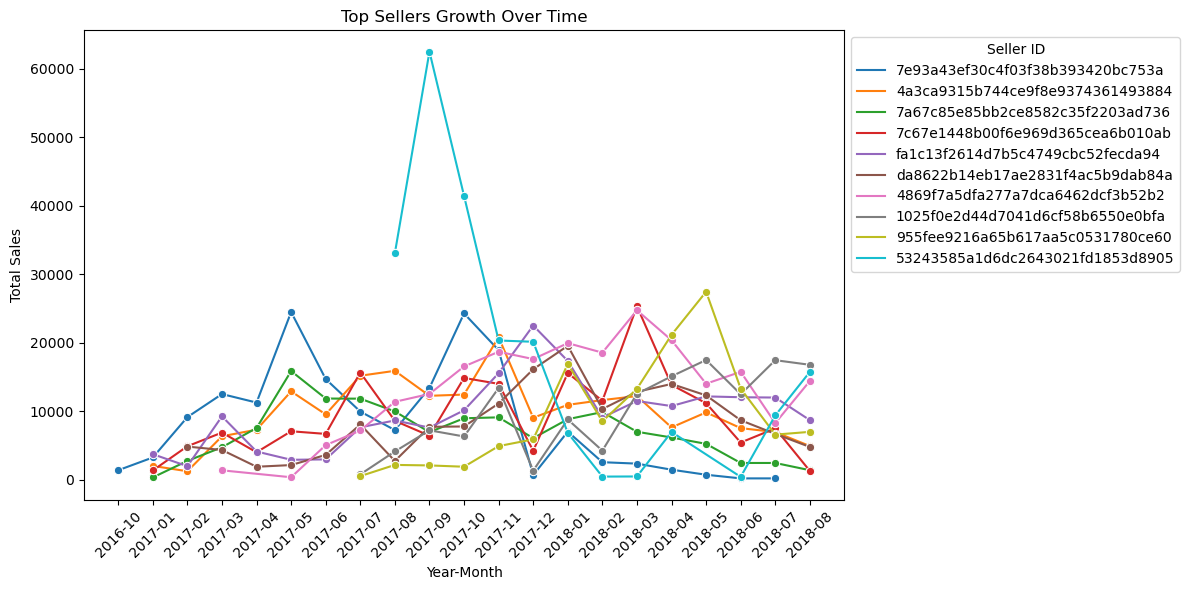

In [10]:
# Eight, do the visualization for top 10 sellers
# Group the data by 'year-month' and 'seller_id' and calculate the total sales
monthly_sales = top_sellers_orders.groupby(['year-month', 'seller_id'])['price'].sum().reset_index()

# Create a line chart to visualize the growth of top sellers over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='year-month', y='price', hue='seller_id', marker='o')
plt.title('Top Sellers Growth Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Seller ID', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [207]:
#SECOND BUSINESS OBJECTIVE: Top Seller for every month in every city
# First, combine delivered_orders_and_total_price and seller_df with inner join
seller_order_demographic = pd.merge(
    delivered_orders_and_total_price[['order_id','seller_id', 'price','year-month']],
    seller_df[['seller_id', 'seller_city']],
    on='seller_id',
    how='inner')
seller_order_demographic

,order_id,seller_id,price,year-month,seller_city
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,58.90,2017-09,volta redonda
1,0188777fe321843a18be24a6e9aa1e53,48436dade18ac8b2bce089ec2a041202,55.90,2017-07,volta redonda
2,0191bbb5166d4b9a68df11797d5acfa9,48436dade18ac8b2bce089ec2a041202,132.90,2017-08,volta redonda
3,03054d8a8eefc2981cfad06f58e27979,48436dade18ac8b2bce089ec2a041202,58.90,2017-10,volta redonda
4,0c325ea6925de749e1420be0cf43587c,48436dade18ac8b2bce089ec2a041202,139.90,2017-07,volta redonda
...,...,...,...,...,...
97536,fdaf98feac227eb978d8f33f36e0231d,d1aa1ec0839dcab73a6161130eb1f94a,119.90,2017-04,curitiba
97537,fdfeec75aa07c1d2a88b17b8fbfc7b8f,dbc51f5e45d654ecc16cb68e6817ecea,199.99,2017-02,franca
97538,fe68b52db13993f58175fa589125d345,3fefda3299e6dfaea3466ef346a3571a,209.00,2017-08,curitiba
97539,fefacc66af859508bf1a7934eab1e97f,80ceebb4ee9b31afb6c6a916a574a1e2,6729.00,2018-07,londrina


In [189]:
# Second, look for top seller in every month and every city
# Group the data by 'year-month', 'seller_city', and 'seller_id', and calculate the total price for each group
grouped_data = seller_order_demographic.groupby(['year-month', 'seller_city', 'seller_id'])['price'].sum().reset_index()

# Find the seller with the highest total price in each 'year-month' and 'seller_city'
max_price_sellers = grouped_data.groupby(['year-month', 'seller_city'])['price'].idxmax()

# Get the corresponding seller_id and total price for each maximum
top_sellers_by_month_and_city = grouped_data.loc[max_price_sellers]

top_sellers_by_month_and_city

,year-month,seller_city,seller_id,price
0,2016-09,curitiba,ecccfa2bb93b34a3bf033cc5d1dcdc69,134.97
1,2016-10,afonso claudio,2f4b9d112bfa44a214bc6cef085d17c8,18.90
2,2016-10,araguari,b335c59ab742f751a85db9c411a86739,133.80
3,2016-10,bage,4b90495391ac0bd181a80a459df1e718,248.00
4,2016-10,barretos,700f03c207639c22d933381ff60b35c2,379.98
...,...,...,...,...
15991,2018-08,vila velha,33dd941c27854f7625b968cc6195a552,1277.50
15993,2018-08,vitoria,efff9341f3f8f5237b44ff67ed36a7bf,399.99
15994,2018-08,volta redonda,48436dade18ac8b2bce089ec2a041202,181.98
15995,2018-08,votorantim,23c38debaffe4a25a30fdbd9b586a13f,481.98


In [14]:
#THIRD BUSINESS OBJECTIVE, products with highest rating for every sellers
# We are still not sure if the rating goes for every product within every order_id OR in every order_id only
# First, combine order_review_df and order_items_df
combined_review_order = pd.merge(order_items_df[['order_id', 'product_id','seller_id']], order_review_df[['order_id', 'review_score']], on='order_id', how='inner')
combined_review_order

,order_id,product_id,seller_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,5
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,4
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,5
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,5
...,...,...,...,...
112367,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5
112368,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,5
112369,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,5
112370,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,5


In [15]:
# Now we check order_id that has more than 1 products
combined_review_order['order_id'].value_counts()

5a3b1c29a49756e75f1ef513383c0c12    22
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a43c2440a787e84e9f3060ab257fbdf     1
5a43a71d1ddc76ba951f292c1b4c66c2     1
5a42d01f5fdf7a96312618390f361e72     1
5a41aefdf8010bbd69a5264f69213b73     1
fffe41c64501cc87c801fd61db3f6244     1
Name: order_id, Length: 97917, dtype: int64

In [16]:
# Call a row with 5a3b1c29a49756e75f1ef513383c0c12 in order_id column
combined_review_order[combined_review_order["order_id"] == "5a3b1c29a49756e75f1ef513383c0c12"]
# We can conclude that customers gave the rating for every order not specific for every product. 
# However, we still could calculate every product's rating

,order_id,product_id,seller_id,review_score
39605,5a3b1c29a49756e75f1ef513383c0c12,99444c1e11fc38755dae86f5c67d3d1a,d2374cbcbb3ca4ab1086534108cc3ab7,1
39606,5a3b1c29a49756e75f1ef513383c0c12,99444c1e11fc38755dae86f5c67d3d1a,d2374cbcbb3ca4ab1086534108cc3ab7,1
39607,5a3b1c29a49756e75f1ef513383c0c12,17d8b8e9c21ec0fc5b33724e32fe422e,d2374cbcbb3ca4ab1086534108cc3ab7,1
39608,5a3b1c29a49756e75f1ef513383c0c12,17d8b8e9c21ec0fc5b33724e32fe422e,d2374cbcbb3ca4ab1086534108cc3ab7,1
39609,5a3b1c29a49756e75f1ef513383c0c12,399f54c06661d06ca45c6e24ed238e0e,d2374cbcbb3ca4ab1086534108cc3ab7,1
39610,5a3b1c29a49756e75f1ef513383c0c12,399f54c06661d06ca45c6e24ed238e0e,d2374cbcbb3ca4ab1086534108cc3ab7,1
39611,5a3b1c29a49756e75f1ef513383c0c12,6a0713a63e990052795623e76cc2995e,d2374cbcbb3ca4ab1086534108cc3ab7,1
39612,5a3b1c29a49756e75f1ef513383c0c12,6a0713a63e990052795623e76cc2995e,d2374cbcbb3ca4ab1086534108cc3ab7,1
39613,5a3b1c29a49756e75f1ef513383c0c12,99444c1e11fc38755dae86f5c67d3d1a,d2374cbcbb3ca4ab1086534108cc3ab7,1
39614,5a3b1c29a49756e75f1ef513383c0c12,99444c1e11fc38755dae86f5c67d3d1a,d2374cbcbb3ca4ab1086534108cc3ab7,1


In [17]:
#Second, combine products_df and product_category_df to get products' name in english that we will use later
product_english = pd.merge(products_df[['product_id','product_category_name']], product_category_df[['product_category_name', 'product_category_name_english']], on='product_category_name', how='inner')
product_english

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,perfumery
...,...,...,...
32323,13b25797ad1e6d6c7cd3cbeb35f8ee7a,moveis_colchao_e_estofado,furniture_mattress_and_upholstery
32324,dc36a7859b743d8610a2bbbaea26ece9,moveis_colchao_e_estofado,furniture_mattress_and_upholstery
32325,107fde0930956120d1e13dd1062fbb46,moveis_colchao_e_estofado,furniture_mattress_and_upholstery
32326,726b4e18f00255e2e63491bcba3f60b8,moveis_colchao_e_estofado,furniture_mattress_and_upholstery


In [18]:
#Third, combine combined_review_order and orders_df to make sure the data will be used for has "delivered" status
review_order_delivered = pd.merge(combined_review_order, orders_df[['order_id', 'order_status']], on='order_id', how='inner')
review_order_delivered

,order_id,product_id,seller_id,review_score,order_status
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,5,delivered
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,4,delivered
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,5,delivered
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,4,delivered
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,5,delivered
...,...,...,...,...,...
110008,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5,delivered
110009,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,5,delivered
110010,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,5,delivered
110011,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,5,delivered


In [19]:
#Fourth, combine review_order_delivered and product_english to get product's name in english for every order_id
review_product_name_delivered = pd.merge(review_order_delivered, product_english, on='product_id', how='inner')
review_product_name_delivered

,order_id,product_id,seller_id,review_score,order_status,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,5,delivered,cool_stuff,cool_stuff
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,5,delivered,cool_stuff,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,4,delivered,cool_stuff,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,5,delivered,cool_stuff,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,5,delivered,cool_stuff,cool_stuff
...,...,...,...,...,...,...,...
108453,ffebd80e3291e811c308365936897efd,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,5,delivered,ferramentas_jardim,garden_tools
108454,ffee31fb4b5e35c9123608015637c495,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,4,delivered,moveis_decoracao,furniture_decor
108455,fff7c4452f050315db1b3f24d9df5fcd,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,5,delivered,relogios_presentes,watches_gifts
108456,fffa82886406ccf10c7b4e35c4ff2788,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,4,delivered,esporte_lazer,sports_leisure


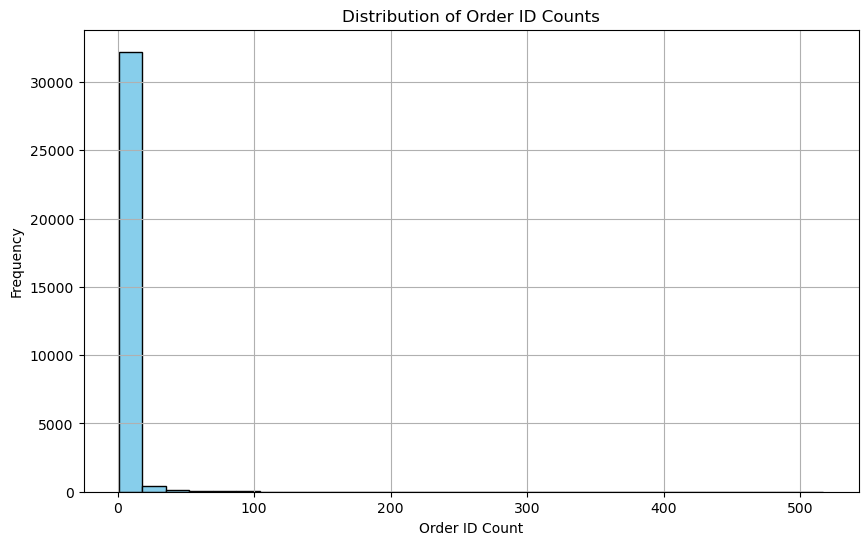

In [20]:
#Fifth, to prevent any outlier, we need to know how many product_id are delivered per seller_id
product_delivered_outlier_check = review_product_name_delivered.groupby(['seller_id', 'product_id', ])['order_id'].count().reset_index()

# Create a histogram for the 'order_id' column
plt.figure(figsize=(10, 6))
plt.hist(product_delivered_outlier_check['order_id'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Order ID Count')
plt.ylabel('Frequency')
plt.title('Distribution of Order ID Counts')
plt.grid(True)
plt.show()

#We can conclude that the data is very skewed and there are too many rows that have 1 order_id. 
#Therefore, I will only analyze sellers who delivered more than 10 products per product_id

In [21]:
#Sixth, filter seller_id & product_id who had order_id more than 10
product_delivered_filtered = product_delivered_outlier_check[product_delivered_outlier_check['order_id'] > 10]
product_delivered_filtered.sort_values(by='order_id', ascending=False)

,seller_id,product_id,order_id
20155,955fee9216a65b617aa5c0531780ce60,aca2eb7d00ea1a7b8ebd4e68314663af,517
4478,1f50f920176fa81dab994f9023523100,422879e10f46682990de24d770e7f83d,486
9469,4a3ca9315b744ce9f8e9374361493884,99a4788cb24856965c36a24e339b6058,466
4476,1f50f920176fa81dab994f9023523100,389d119b48cf3043d311335e499d9c6b,389
4475,1f50f920176fa81dab994f9023523100,368c6c730842d78016ad823897a372db,388
...,...,...,...
27843,da8622b14eb17ae2831f4ac5b9dab84a,3cc4b421c1f28dd22e86fc4aaafb600e,11
11040,53e4c6e0f4312d4d2107a8c9cddf45cd,b2fd74298e16eef2568d2f9dff6042c8,11
10835,5343d0649eca2a983820bfe93fc4d17e,6d3d8ade6b793a08b041b6bc653c08ca,11
10674,527801b552d0077ffd170872eb49683b,1cc61b32763a4d816212b3507b6b6c59,11


In [22]:
#seventh, edit review_product_name_delivered by groupby seller_id & product_id and calculate the average of review score
review_grouped = review_product_name_delivered.groupby(['seller_id','product_id'])['review_score'].mean().reset_index()
review_grouped

,seller_id,product_id,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,4.100917
2,001cca7ae9ae17fb1caed9dfb1094831,0da9ffd92214425d880de3f94e74ce39,4.411765
3,001cca7ae9ae17fb1caed9dfb1094831,21fecd254a3103704126b28478ea7980,4.000000
4,001cca7ae9ae17fb1caed9dfb1094831,4d7fee7877228c1497477ae53d97c214,4.000000
...,...,...,...
32906,ffff564a4f9085cd26170f4732393726,a819714dd23a6ac18b1be2b13686017b,1.000000
32907,ffff564a4f9085cd26170f4732393726,c4b925e40f11289063a854c47aaef129,5.000000
32908,ffff564a4f9085cd26170f4732393726,cb17b798ba889575385281b7ec2fc22b,3.000000
32909,ffff564a4f9085cd26170f4732393726,dbd024d4182504993ad1e3cd2ee9d9e9,1.000000


In [23]:
#Eight, merge review_grouped and product_delivered_filtered
filtered_product_and_review = pd.merge(review_grouped[['seller_id','product_id','review_score']], product_delivered_filtered[['seller_id','product_id']], on=['seller_id', 'product_id'], how='inner')
filtered_product_and_review

,seller_id,product_id,review_score
0,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,4.100917
1,001cca7ae9ae17fb1caed9dfb1094831,0da9ffd92214425d880de3f94e74ce39,4.411765
2,001cca7ae9ae17fb1caed9dfb1094831,547b95702aec86f05ac37e61d164891c,2.941176
3,001cca7ae9ae17fb1caed9dfb1094831,98a8c2fa16d7239c606640f5555768e4,3.892857
4,001cca7ae9ae17fb1caed9dfb1094831,e251ebd2858be1aa7d9b2087a6992580,4.000000
...,...,...,...
1577,febab0275244b9a49a623f0bd613ca2f,574597aaf385996112490308e37399ce,4.833333
1578,febab0275244b9a49a623f0bd613ca2f,dd60cac04e6bcbc919cb1c7dcc473211,4.714286
1579,ff063b022a9a0aab91bad2c9088760b7,a5341e3f8155dbb3e62323d3ea289729,4.365854
1580,ff063b022a9a0aab91bad2c9088760b7,a8075470f960215ffb67624782f80fec,4.393939


In [26]:
#Nine, I want to know for every seller, what are their best product (product with the highest average review score)

# Group the data by 'seller_id' and find the index of the highest review score for each group
idx = filtered_product_and_review.groupby('seller_id')['review_score'].idxmax()

# Use the index to select the rows with the highest review score
highest_review_products = filtered_product_and_review.loc[idx]

highest_review_products

,seller_id,product_id,review_score
1,001cca7ae9ae17fb1caed9dfb1094831,0da9ffd92214425d880de3f94e74ce39,4.411765
6,002100f778ceb8431b7a1020ff7ab48f,414c53fa9c5cc4a0390682aeb2e25ec1,4.500000
7,004c9cd9d87a3c30c522c48c4fc07416,54af11c815f92135fb554bd9c97dd418,4.538462
12,00ee68308b45bc5e2660cd833c3f81cc,96d1c06692244e2fed6e1f9aa9552770,4.636364
19,00fc707aaaad2d31347cf883cd2dfe10,656e0eca68dcecf6a31b8ececfabe3e8,4.520000
...,...,...,...
1568,fde0cc9ea29c8ccfc0a2c22256a58c71,e1e932dfb67414e80b87ad97688cf2a3,4.521739
1573,fe2032dab1a61af8794248c8196565c9,62c89abe1afe3a23c17765d462718a4c,4.937500
1577,febab0275244b9a49a623f0bd613ca2f,574597aaf385996112490308e37399ce,4.833333
1580,ff063b022a9a0aab91bad2c9088760b7,a8075470f960215ffb67624782f80fec,4.393939
